# 0. Table of Content

- [1 Exploratory Data Analysis](#1-exploratory-data-analysis)
- [2 Method 1: Logistic Regression](#2-method-1:-logistic-regression)
- [3 Method 2: Paired t-test](#3-method-2:-paired-t-test)
- [4 Conclusion](#4-conclusion)

# 1. Exploratory Data Analysis
## 1.1 Loading the data set.


In [53]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import math
import statsmodels.api as sm
import scipy.stats as stats

#Define filename and directory of the dataset
name = 'augmento_btc.csv'

#Load dataset using pandas read_excel function, setting header=1 to use first row as column names for DataFrame
sentiment_data = pd.read_csv(name, header=0)

## 1.2 Variable types and dimensions

In [54]:
#Print types of data present in set and shape of dataset
print(sentiment_data.dtypes)
print('Dimensions of dataset:', sentiment_data.shape)
# Filter the dataset to only include the listing close and reddit columns

reddit_columns = [
    'reddit_fomo',
    'reddit_uncertain',
    'reddit_hopeful',
    'reddit_bearish',
    'reddit_pessimistic_doubtful',
    'reddit_sad',
    'reddit_fearful_concerned',
    'reddit_angry',
    'reddit_mistrustful',
    'reddit_panicking',
    'reddit_annoyed_frustrated',
    'reddit_bullish',
    'reddit_optimistic',
    'reddit_happy',
    'reddit_euphoric_excited',
]

select_data = sentiment_data[reddit_columns]

print(select_data.head())

date                             object
listing_close                   float64
twitter_hacks                   float64
twitter_pessimistic_doubtful    float64
twitter_banks                   float64
                                 ...   
reddit_rumor                    float64
reddit_scam_fraud               float64
reddit_airdrop                  float64
reddit_optimistic               float64
reddit_negative                 float64
Length: 281, dtype: object
Dimensions of dataset: (71869, 281)
   reddit_fomo  reddit_uncertain  reddit_hopeful  reddit_bearish  \
0          0.0               1.0             0.0             0.0   
1          0.0               0.0             0.0             0.0   
2          1.0               2.0             0.0             0.0   
3          0.0               1.0             1.0             0.0   
4          0.0               2.0             0.0             0.0   

   reddit_pessimistic_doubtful  reddit_sad  reddit_fearful_concerned  \
0               

# 2 Data cleaning
## 2.1 Data types in columns
- **Only numbers of type float present...good**




In [55]:
def which_types(column): #Function to identify datatypes of each variable and reduce code redundancy
    types = []
    print(column.name, 'structure:')
    for entry in column:
        if type(entry) not in types:
            types.append(type(entry))
            print(type(entry))
            print(entry)  

#Print types of data present in all reddit columns
for column in  select_data.columns:
    which_types(select_data[column])

reddit_fomo structure:
<class 'float'>
0.0
reddit_uncertain structure:
<class 'float'>
1.0
reddit_hopeful structure:
<class 'float'>
0.0
reddit_bearish structure:
<class 'float'>
0.0
reddit_pessimistic_doubtful structure:
<class 'float'>
1.0
reddit_sad structure:
<class 'float'>
0.0
reddit_fearful_concerned structure:
<class 'float'>
1.0
reddit_angry structure:
<class 'float'>
0.0
reddit_mistrustful structure:
<class 'float'>
0.0
reddit_panicking structure:
<class 'float'>
0.0
reddit_annoyed_frustrated structure:
<class 'float'>
0.0
reddit_bullish structure:
<class 'float'>
1.0
reddit_optimistic structure:
<class 'float'>
2.0
reddit_happy structure:
<class 'float'>
0.0
reddit_euphoric_excited structure:
<class 'float'>
0.0


## 2.2 Clean columns individually
-**No need to clean columns**

In [56]:
#Create function to clean columns on common error types, to reduce code redundancy
def clean_column(column):
    i=0
    for entry in column:
        if isinstance(entry, int):
            entry = float(entry)
            select_data.loc[i,column.name] = entry 
        if isinstance(entry, float):
            entry = str(entry)
            entry = entry.replace('.','')
            entry = float(entry)
            select_data.loc[i,column.name] = entry 
        if isinstance(entry, str):
            entry = entry.replace(',','')
            entry = float(entry)
            select_data.loc[i,column.name] = entry 
        i+=1

#Call cleaning function on the columns we want to clean

## 2.3 Check for successful cleaning
-**Not needed**

In [57]:
#Call type function again to check for successfull cleaning
for column in  select_data.columns:
    which_types(select_data[column])

reddit_fomo structure:
<class 'float'>
0.0
reddit_uncertain structure:
<class 'float'>
1.0
reddit_hopeful structure:
<class 'float'>
0.0
reddit_bearish structure:
<class 'float'>
0.0
reddit_pessimistic_doubtful structure:
<class 'float'>
1.0
reddit_sad structure:
<class 'float'>
0.0
reddit_fearful_concerned structure:
<class 'float'>
1.0
reddit_angry structure:
<class 'float'>
0.0
reddit_mistrustful structure:
<class 'float'>
0.0
reddit_panicking structure:
<class 'float'>
0.0
reddit_annoyed_frustrated structure:
<class 'float'>
0.0
reddit_bullish structure:
<class 'float'>
1.0
reddit_optimistic structure:
<class 'float'>
2.0
reddit_happy structure:
<class 'float'>
0.0
reddit_euphoric_excited structure:
<class 'float'>
0.0


## 2.4 Create (cleaned) dataset for project
-**Create dataset to only contain reddit features**

-**Check for NaN values**

In [58]:
#Format cleaned_set to be of type int, as we deal with integers from counting data and to have consistent formatting with 'Explicit track'
select_data = select_data.astype(float)

#Check if all datatypes in dataset are now consistent and free of NaN values
print(select_data.dtypes)
print(select_data.head())
select_data.isna().sum()

reddit_fomo                    float64
reddit_uncertain               float64
reddit_hopeful                 float64
reddit_bearish                 float64
reddit_pessimistic_doubtful    float64
reddit_sad                     float64
reddit_fearful_concerned       float64
reddit_angry                   float64
reddit_mistrustful             float64
reddit_panicking               float64
reddit_annoyed_frustrated      float64
reddit_bullish                 float64
reddit_optimistic              float64
reddit_happy                   float64
reddit_euphoric_excited        float64
dtype: object
   reddit_fomo  reddit_uncertain  reddit_hopeful  reddit_bearish  \
0          0.0               1.0             0.0             0.0   
1          0.0               0.0             0.0             0.0   
2          1.0               2.0             0.0             0.0   
3          0.0               1.0             1.0             0.0   
4          0.0               2.0             0.0             

reddit_fomo                    0
reddit_uncertain               0
reddit_hopeful                 0
reddit_bearish                 0
reddit_pessimistic_doubtful    0
reddit_sad                     0
reddit_fearful_concerned       0
reddit_angry                   0
reddit_mistrustful             0
reddit_panicking               0
reddit_annoyed_frustrated      0
reddit_bullish                 0
reddit_optimistic              0
reddit_happy                   0
reddit_euphoric_excited        0
dtype: int64

# 3 Discriptive statistics
## 3.1 Cumulative distribution
We start our discriptive statistical analysis, by plotting the cumulative distribution of values for each variable of interest, to investigate the likelihood of each variable to take a certain value and hoping especially to gain insights regarding our second hypothesis.

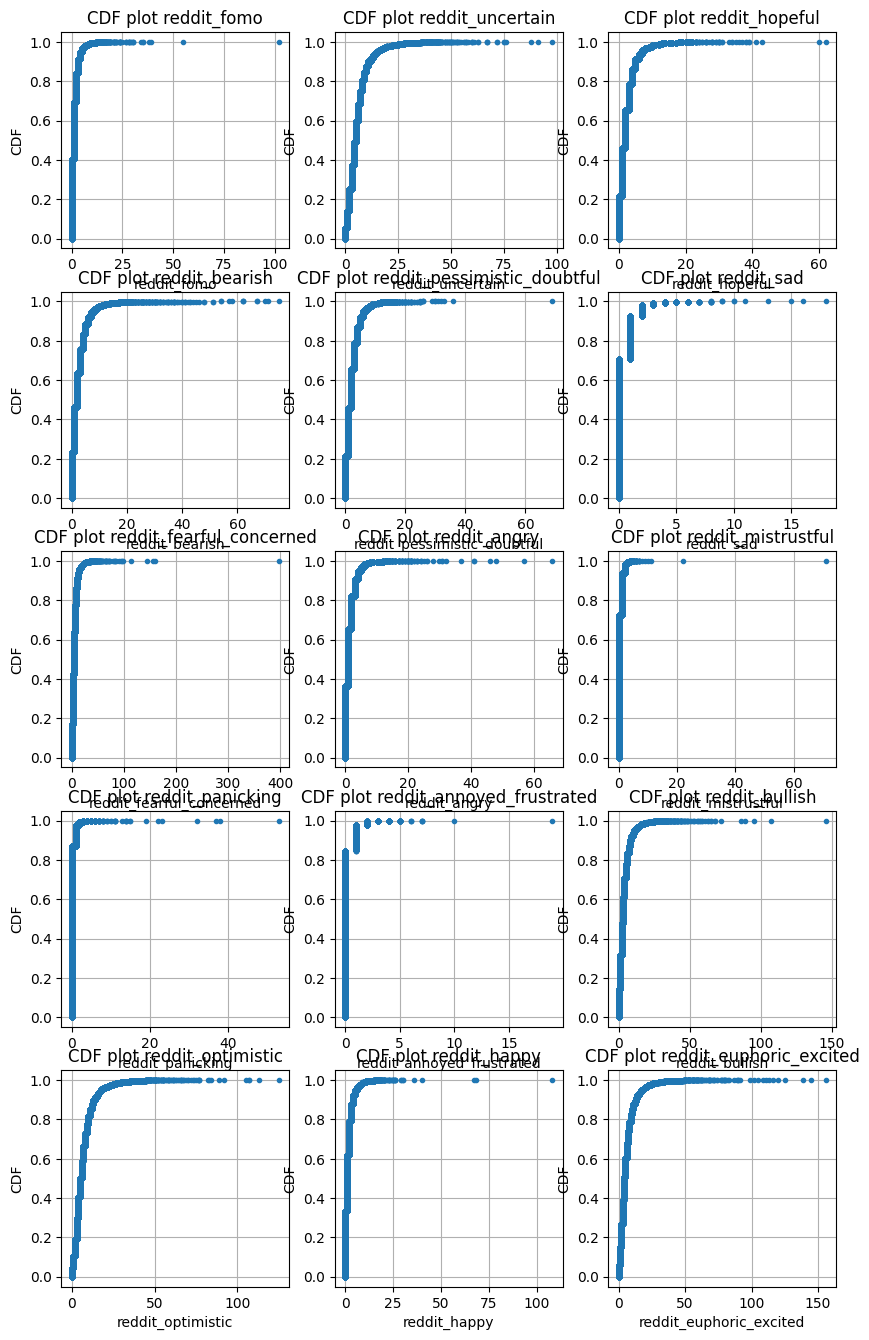

In [59]:
#Function to plot the CDF of a variable and reduce code redundancy
def plot_cdf(columns):
    n_cols = len(columns.shape)
    grid = n_cols/3
    plt.figure(figsize=(10, 50))
    i=0
    g=0
    if n_cols == 1:
        n_plots = 1
    elif n_cols > 1:
        n_plots = columns.shape[1]
    for i in range(0,n_plots):
        plt.subplot(n_plots, 3, i+1)
        sorted = np.sort(columns.iloc[:,i])
        cdf = np.arange(1, len(sorted) + 1) / len(sorted)
        plt.plot(sorted, cdf, marker='.', linestyle='none')
        title = 'CDF plot ' + str(columns.iloc[:,i].name)
        plt.title(title)
        plt.xlabel(str(columns.iloc[:,i].name))
        plt.ylabel('CDF')
        plt.grid(True)
        i+=1
    plt.show()

# Plot the CDF for the filtered data
plot_cdf(select_data)

Looking at the different CDF plots of our variables of interest, we can gather first insights about our data with respect to our research questions.
First of all, we can see that YouTube views and Pandora Track stations exhibit a steep increase, which indicates a skewed value distribution, where observations are likely to have a lower value.
The CDF plot of Spotify Streams and Spotify Playlist count are less skewed, which already delivers a first indication of difference in streaming success, that is especially of interest for our second research question.

## 3.2 Kernel density
The discrepancy of the cumulative value distributions for Spotify data and the other streaming platforms motivated us to further analyse the density ditribution across these platforms.
We therefore hope to gain further insights on skewness, kurtosis, and outliers in the variables.

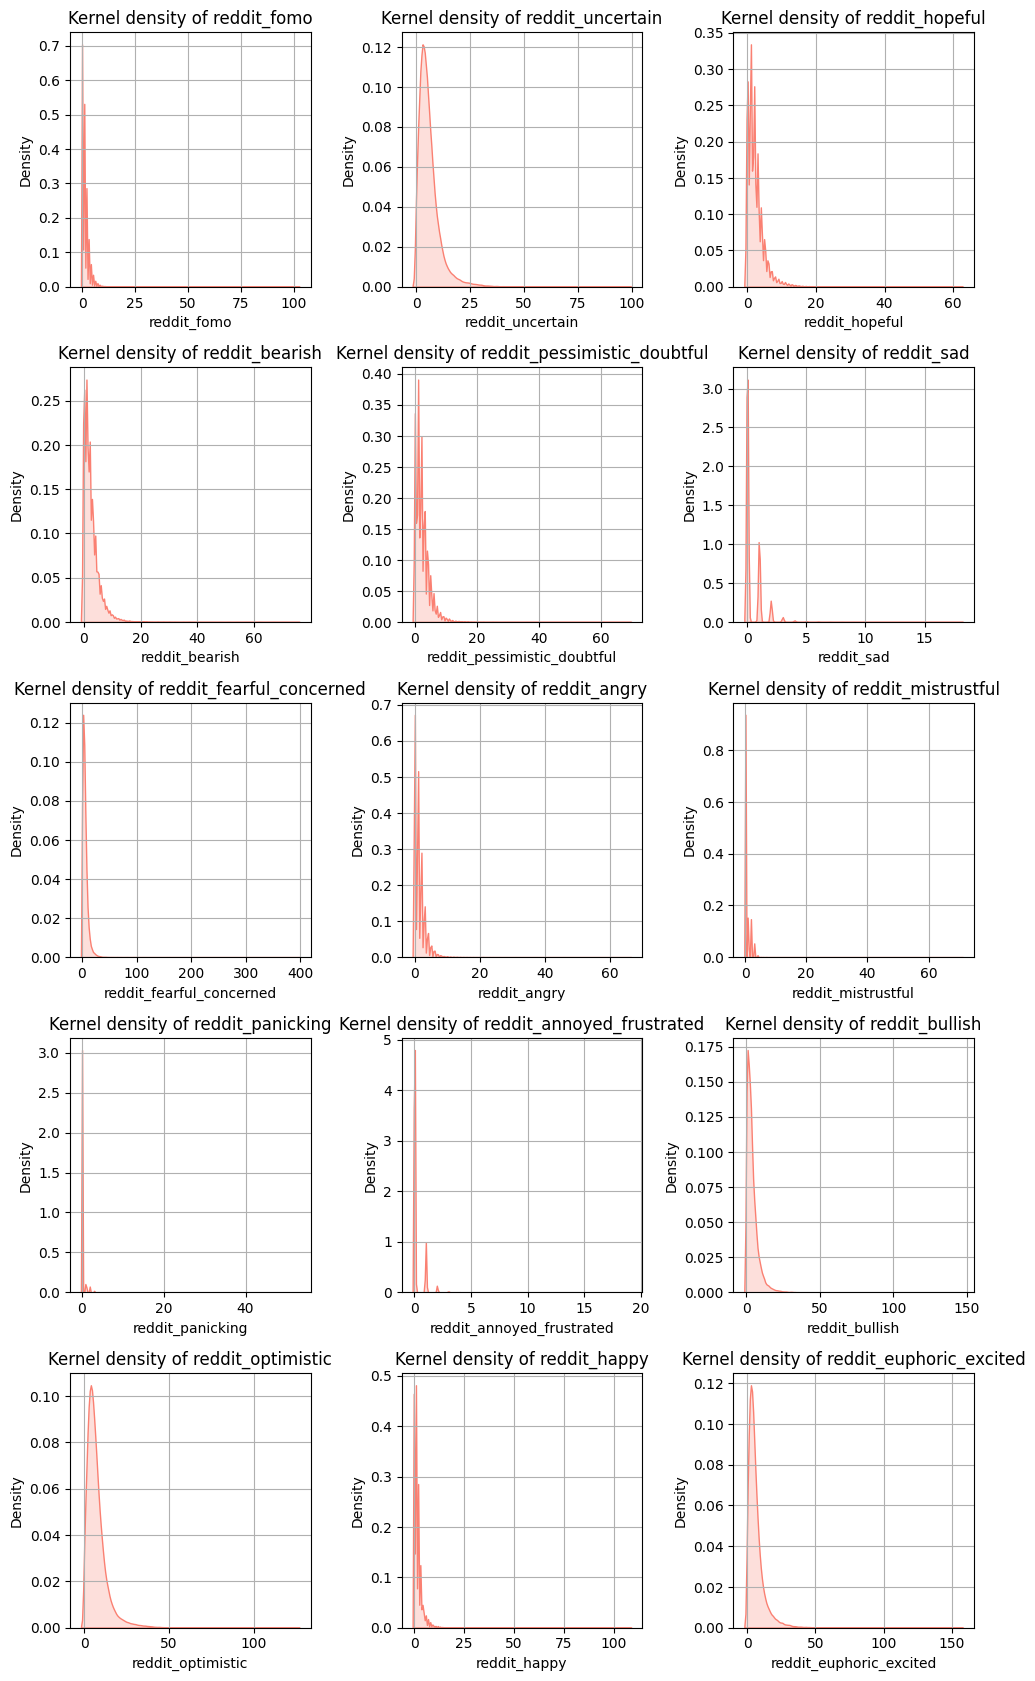

In [60]:
#Function to plot the kernel density of a variable and reduce code redundancy
def plot_kernel_density(columns):
    n_cols = len(columns.shape)
    plt.figure(figsize=(10, 50))
    grid = n_cols/3
    i=0
    if n_cols == 1:
        n_plots = 1
    elif n_cols > 1:
        n_plots = columns.shape[1]
    for i in range(0,n_plots):
        plt.subplot(n_plots, 3, i+1)
        sns.kdeplot(columns.iloc[:,i], fill=True, color='salmon',)
        title = 'Kernel density of ' + str(columns.iloc[:,i].name)
        plt.title(title)
        plt.xlabel(columns.iloc[:,i].name)
        plt.ylabel('Density')
        plt.grid(True)
        plt.tight_layout()
    plt.show()

# Plot the CDF for the filtered data
plot_kernel_density(select_data)

**Right skewed with a lot of outliers**

## 3.3 Boxplots
Lastly we decide to use Boxplots as a method to take a closer look at outliers and the interquartile range of each variable.
Furthermore, we want to examine the 

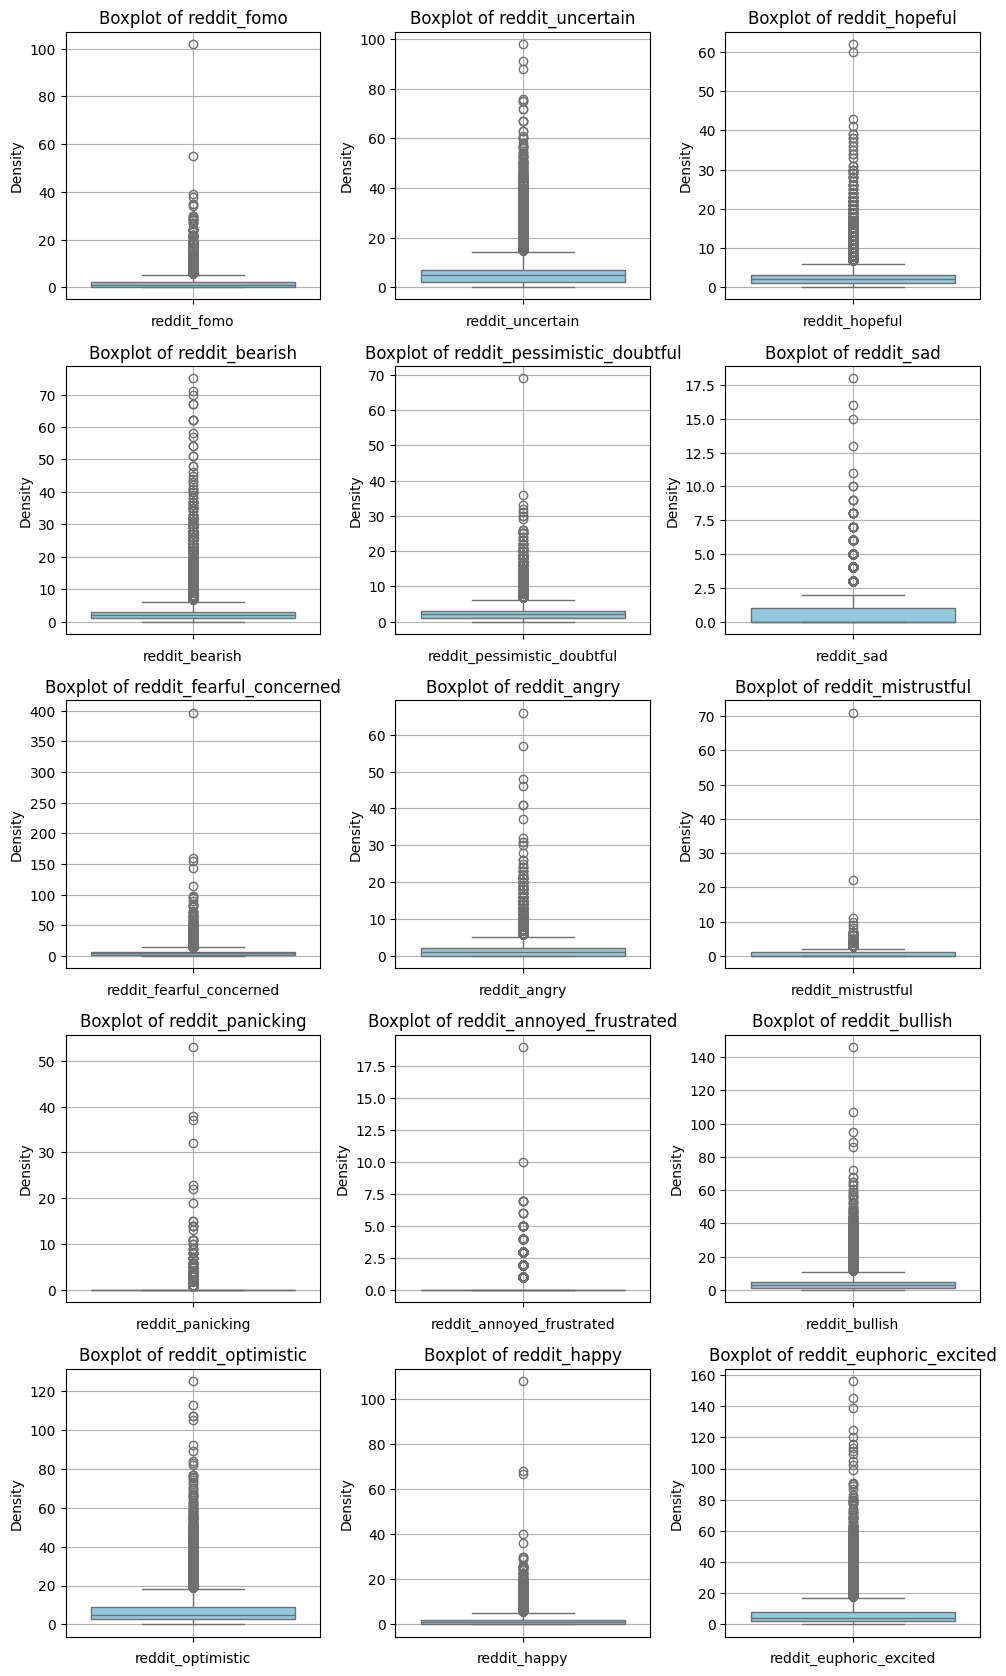

In [61]:
#Create boxplot function to reduce code reduncdancy
def plot_boxplot(columns):
    n_cols = len(columns.shape)
    plt.figure(figsize=(10, 50))
    grid = n_cols/3
    i=0
    if n_cols == 1:
        n_plots = 1
    elif n_cols > 1:
        n_plots = columns.shape[1]
    for i in range(0,n_plots):
        plt.subplot(n_plots, 3, i+1)
        sns.boxplot(y=columns.iloc[:,i], color='skyblue')
        title = 'Boxplot of ' + str(columns.iloc[:,i].name)
        plt.title(title)
        plt.xlabel(columns.iloc[:,i].name)
        plt.ylabel('Density')
        plt.grid(True)
        plt.tight_layout()
    plt.show()

# Plot the CDF for the filtered data
plot_boxplot(select_data)

-**Large amounts of outliers present in most variables and right skewed**

## 3.4 Correlation matrices

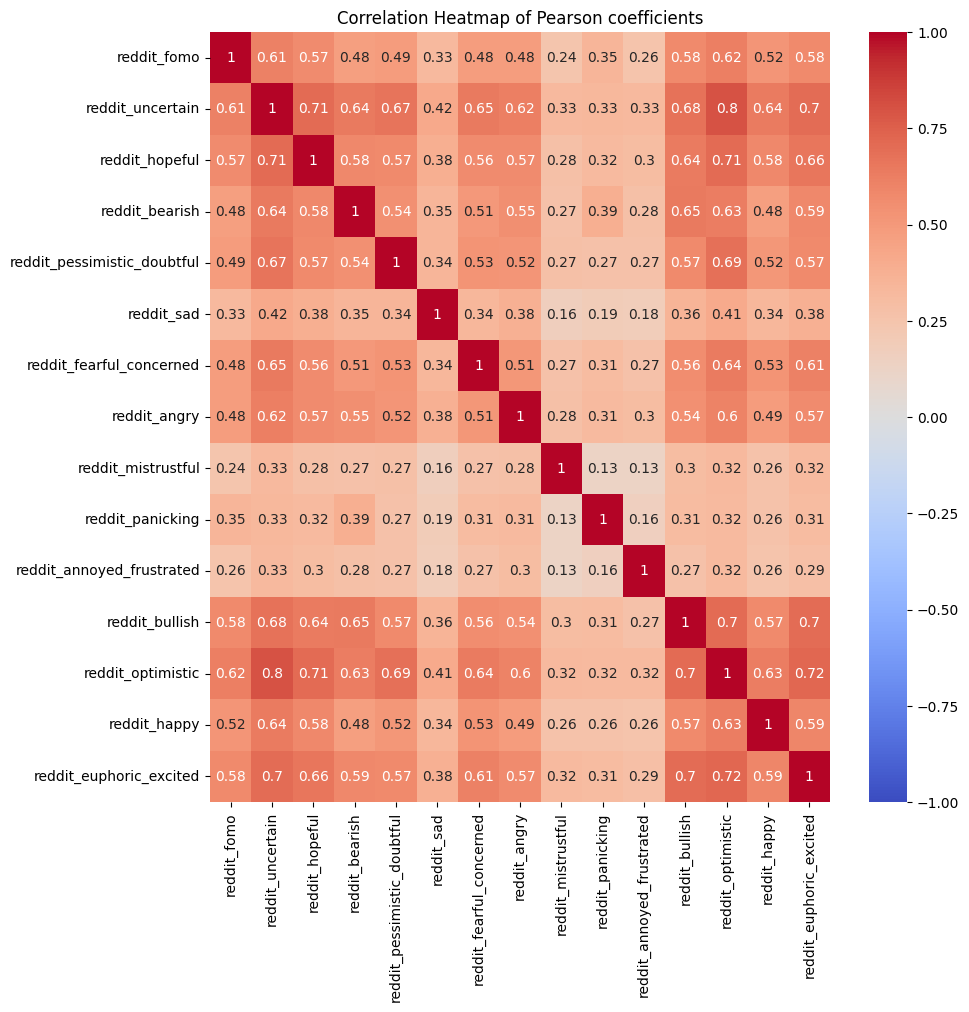

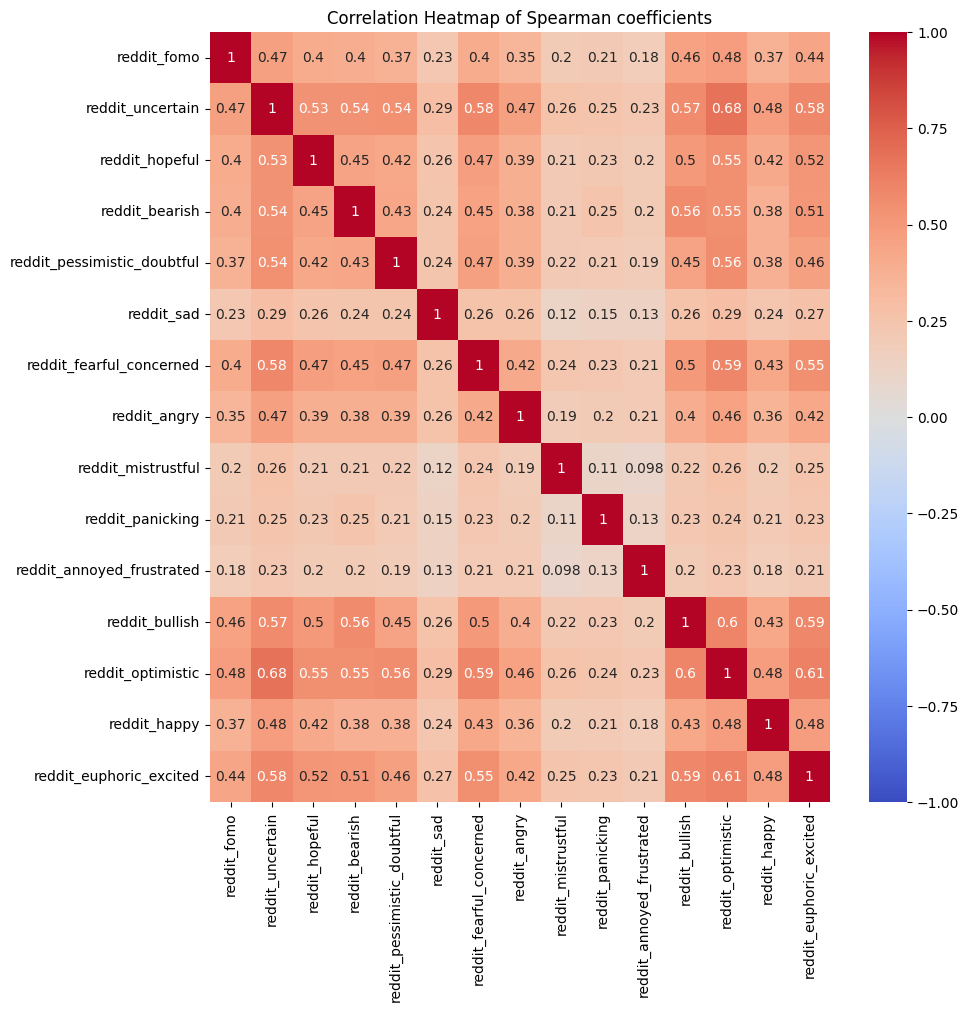

In [62]:
#Compute pearson correlation matrix 
pearson_corr = select_data.corr(method='pearson')

#Compute spearman correlation matrix 
spearman_corr = select_data.corr(method='spearman')

#Make heatmaps for better visualization 
plt.figure(figsize=(10, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pearson coefficients')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Spearman coefficients')
plt.show()

-**Strong correlations between features !**

## 3.5 Log transformation
-**To reduce impact of outliers and achieve better distributed features**

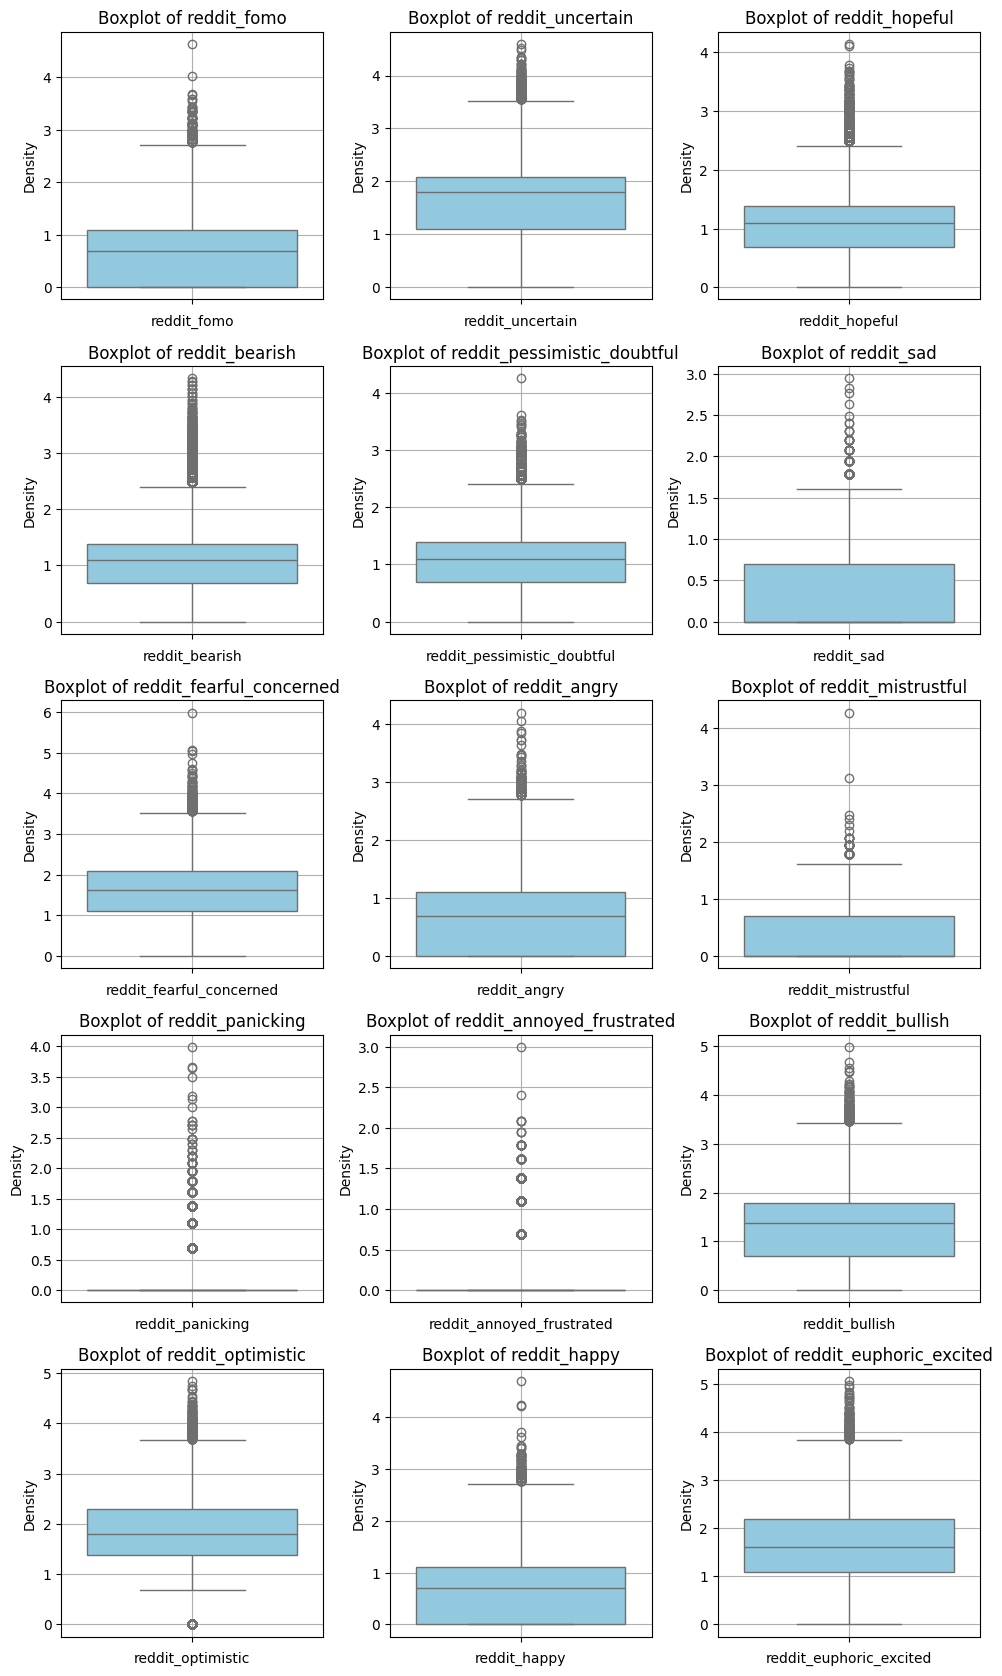

In [63]:
#Log transformation of variables to reduce skewness
transformed_select_data = np.log(select_data+1)

plot_boxplot(transformed_select_data)

-**Transformation improved distribution for some variables and reduced the impact of outliers**

## 3.6 K-means clustering

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kme

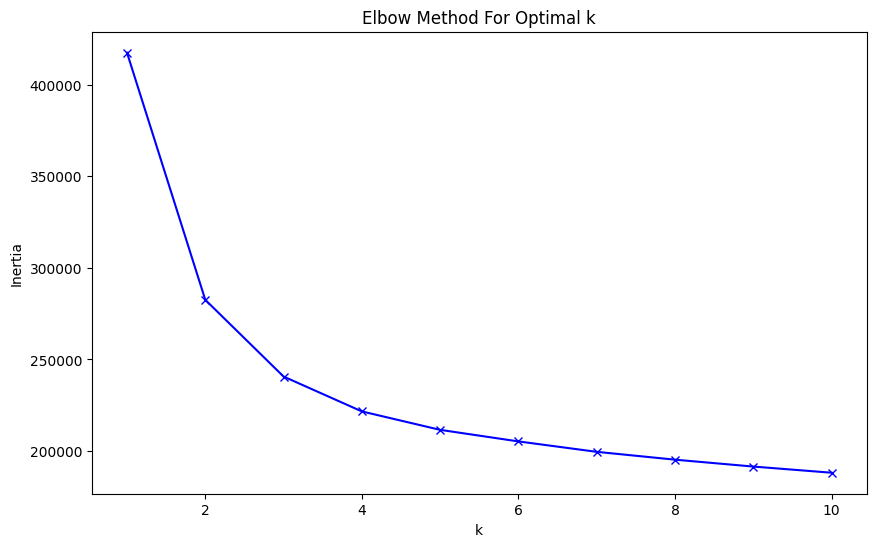

In [64]:
# Implement elbow method to find optimal k
inertia = []
k_range = range(1, 11)  # Test k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_select_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/Users/bob/opt/anaconda3/envs/tf_cpu_only/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


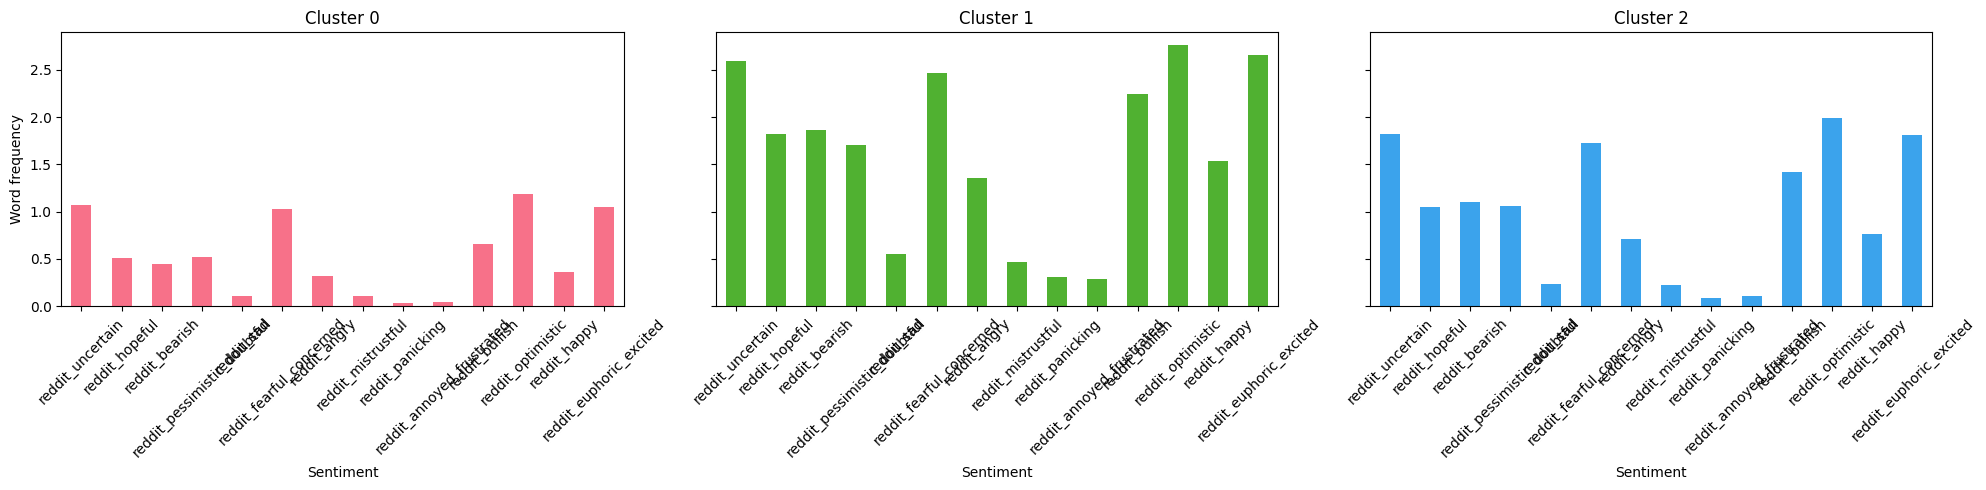

,reddit_uncertain,reddit_hopeful,reddit_bearish,reddit_pessimistic_doubtful,reddit_sad,reddit_fearful_concerned,reddit_angry,reddit_mistrustful,reddit_panicking,reddit_annoyed_frustrated,reddit_bullish,reddit_optimistic,reddit_happy,reddit_euphoric_excited
cluster_kmeans,,,,,,,,,,,,,,
0,1.075155,0.505251,0.451708,0.518815,0.111200,1.024248,0.323136,0.108451,0.031577,0.047982,0.653701,1.190595,0.358907,1.052302
1,2.593635,1.817585,1.860942,1.705355,0.552356,2.462775,1.358989,0.464710,0.305126,0.290758,2.246120,2.760257,1.537347,2.655562
2,1.818530,1.048633,1.100442,1.059761,0.234189,1.725197,0.710297,0.225535,0.086356,0.110655,1.423298,1.986585,0.762937,1.814482


In [65]:
#K means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
transformed_select_data['cluster_kmeans'] = kmeans.fit_predict(transformed_select_data)

# INSTRUCTION: group the observation by clusters and compute the mean of all variables except the user ID.
grouped_df = transformed_select_data.iloc[:,1:].groupby('cluster_kmeans').mean()

# Set up the figure and axis for subplots
num_clusters = k
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 5), sharey=True)

# Define colors for the bars
colors = sns.color_palette('husl', num_clusters)

# Plot each cluster's data in its subplot
for i in range(num_clusters):
    ax = axes[i]
    cluster_data = grouped_df.iloc[i,:] 
    cluster_data.plot(kind='bar', ax=ax, color=colors[i], legend=False)
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Word frequency')
    ax.set_xticklabels(cluster_data.index, rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

grouped_df


## 3.7 Exploratory Factor Analysis

In [66]:
#Exploratory factor analysis for transformed data
from factor_analyzer import calculate_kmo, FactorAnalyzer
efa_data = select_data

kmo_all, kmo_model = calculate_kmo(efa_data)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8 for acceptable factor analysis)")

#Factor seelction based on Kaiser criterion
fa = FactorAnalyzer(n_factors=efa_data.shape[1], rotation=None)
fa.fit(efa_data)


KMO Model Score: 0.970 (must be > 0.5; should be > 0.8 for acceptable factor analysis)


FactorAnalyzer(n_factors=15, rotation=None, rotation_kwargs={})

### 3.7.1 Factor selection based on eigenvalues
Keep factors with eigenvalues larger 1...

In [67]:
# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

eigenvalues

array([7.68196302, 0.89546416, 0.85868716, 0.8325825 , 0.76550484,
       0.57201778, 0.51663066, 0.47935072, 0.47632073, 0.45561574,
       0.3756554 , 0.35140912, 0.28124661, 0.26686227, 0.19068929])

-**First 56 factors should be selected according to Kaiser criterion.**

### 3.7.2 Factor selection based on cumulative variance
-60% of explained cumulative variance is sufficient

In [68]:
#Factor selection based on cumulative variance explained
variance_explained_fa_solution1 = fa.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [4.89498175e-01 2.13156881e-02 1.44939372e-02 1.39211189e-02
 8.72785055e-03 7.78457727e-03 4.28220178e-03 3.34067861e-03
 3.08506404e-03 2.63871287e-03 1.88504599e-03 8.95812036e-04
 5.57374691e-04 7.26379810e-05 0.00000000e+00]
Cumulative variance explained:
 [0.48949817 0.51081386 0.5253078  0.53922892 0.54795677 0.55574135
 0.56002355 0.56336423 0.56644929 0.569088   0.57097305 0.57186886
 0.57242624 0.57249887 0.57249887]


-**Keep first 29 factors to achieve 60% explained variance**

### 3.7.3 Factor selection based on Scree plot

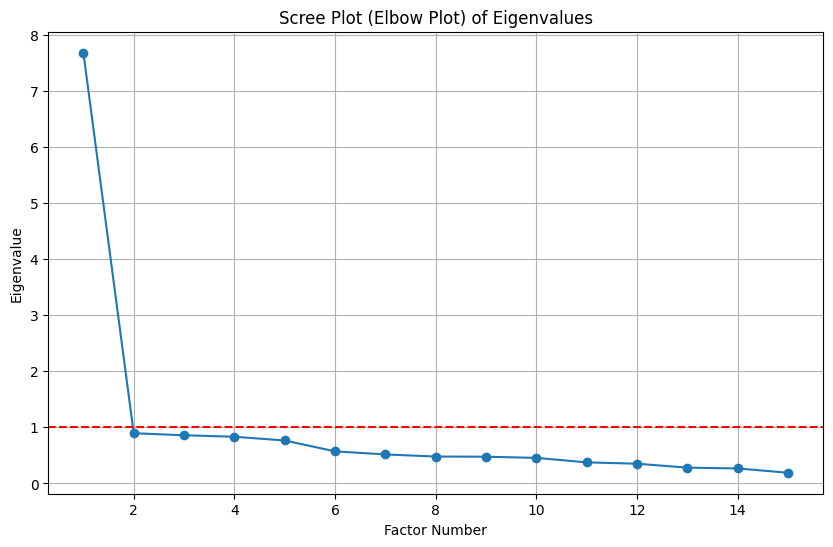

In [69]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, efa_data.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

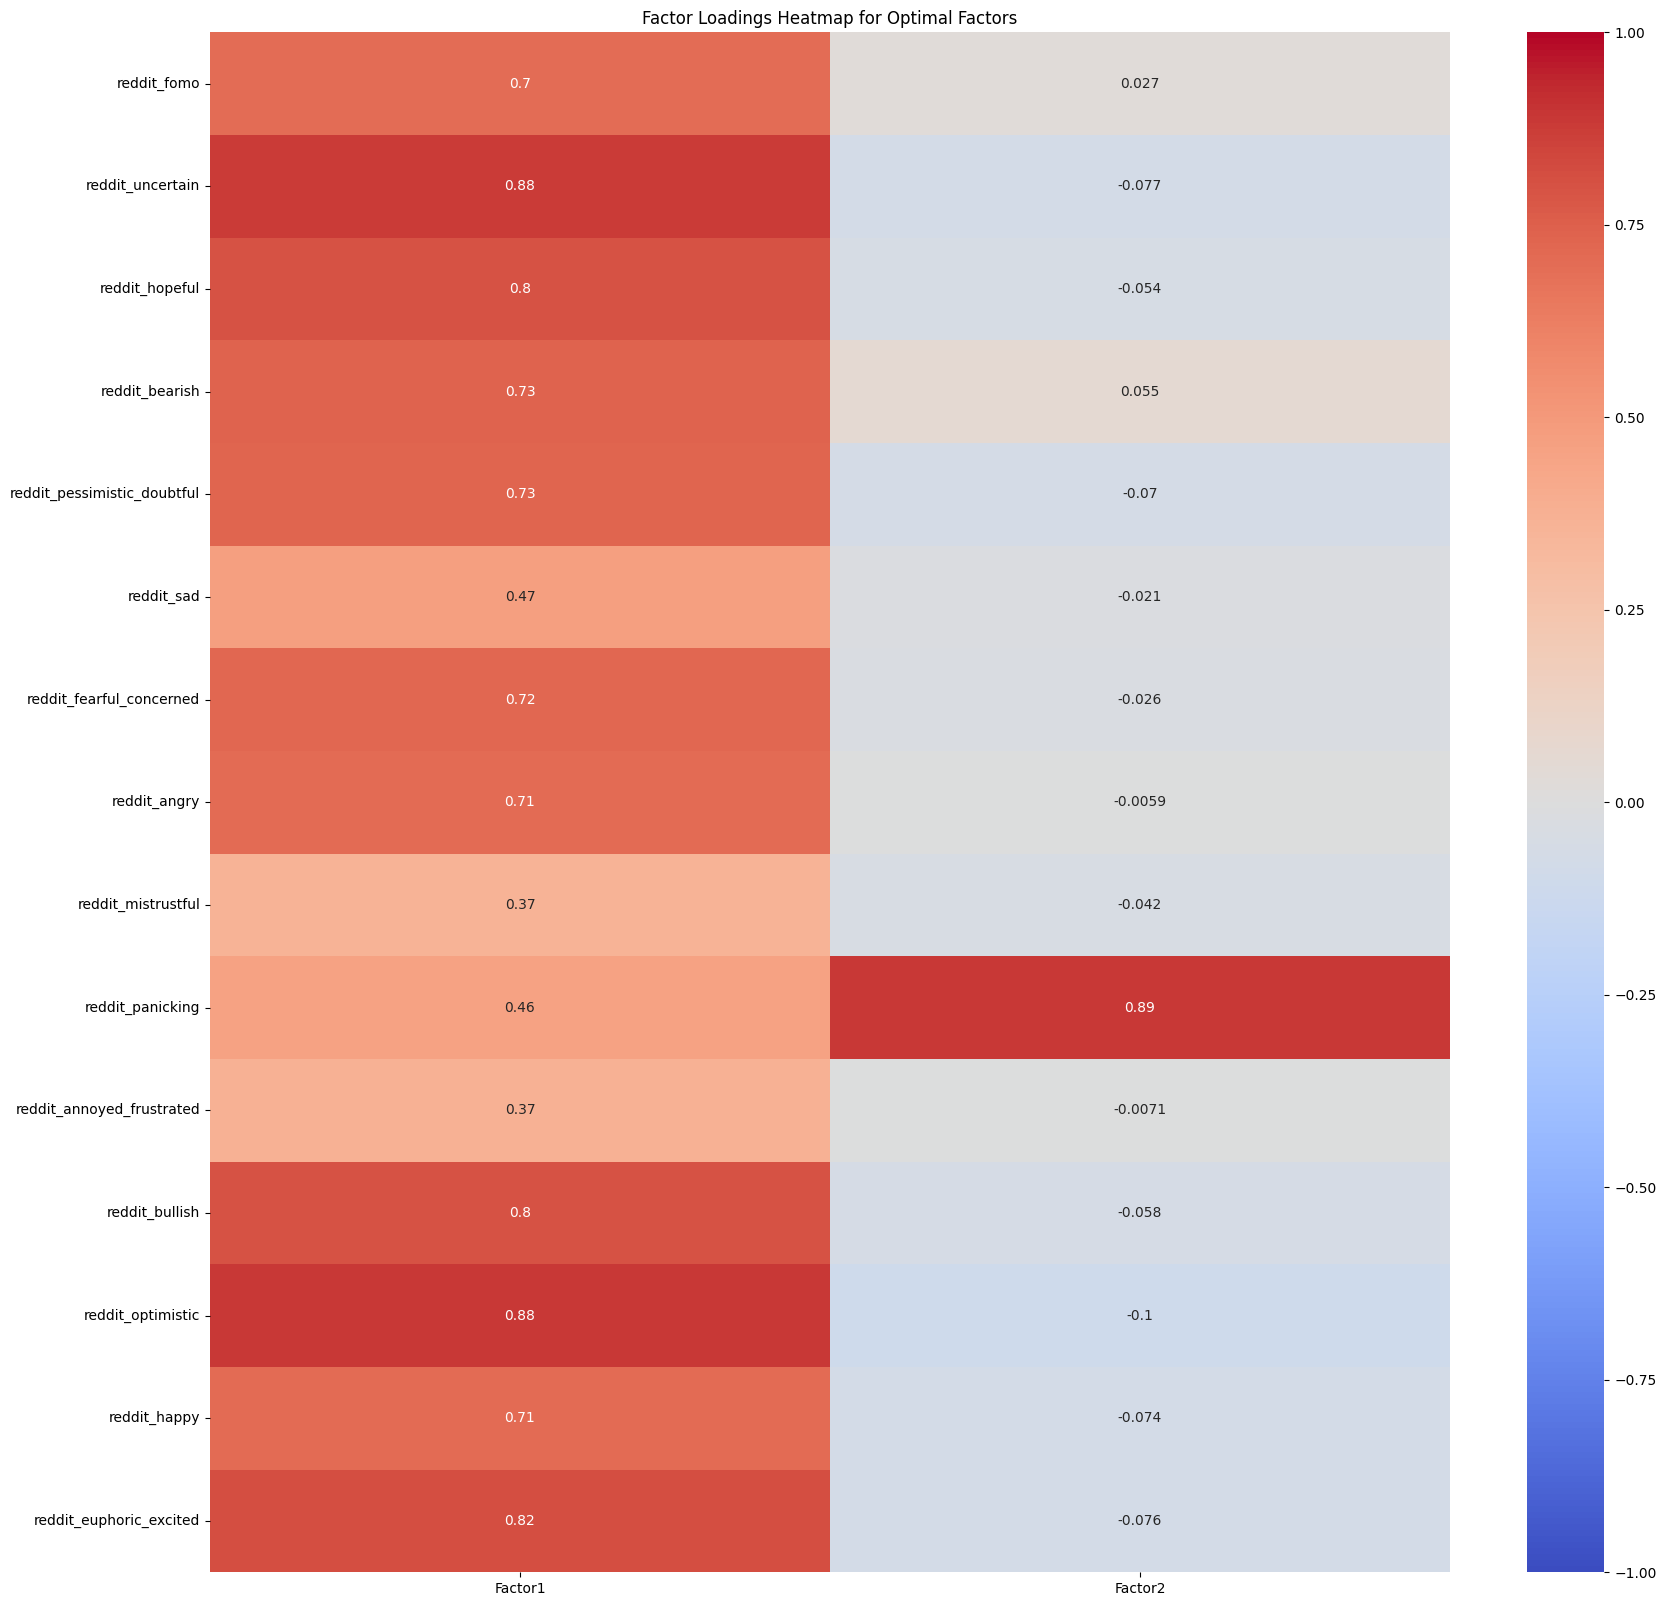

,Factor1,Factor2
reddit_fomo,0.696328,0.026682
reddit_uncertain,0.879979,-0.077241
reddit_hopeful,0.798382,-0.054431
reddit_bearish,0.734856,0.055225
reddit_pessimistic_doubtful,0.729741,-0.070177
reddit_sad,0.473017,-0.021437
reddit_fearful_concerned,0.719041,-0.026036
reddit_angry,0.707428,-0.005907
reddit_mistrustful,0.366980,-0.041633
reddit_panicking,0.457002,0.886714


In [71]:
#Computing factors without rotation
optimal_factors = 2

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fa_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
#print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

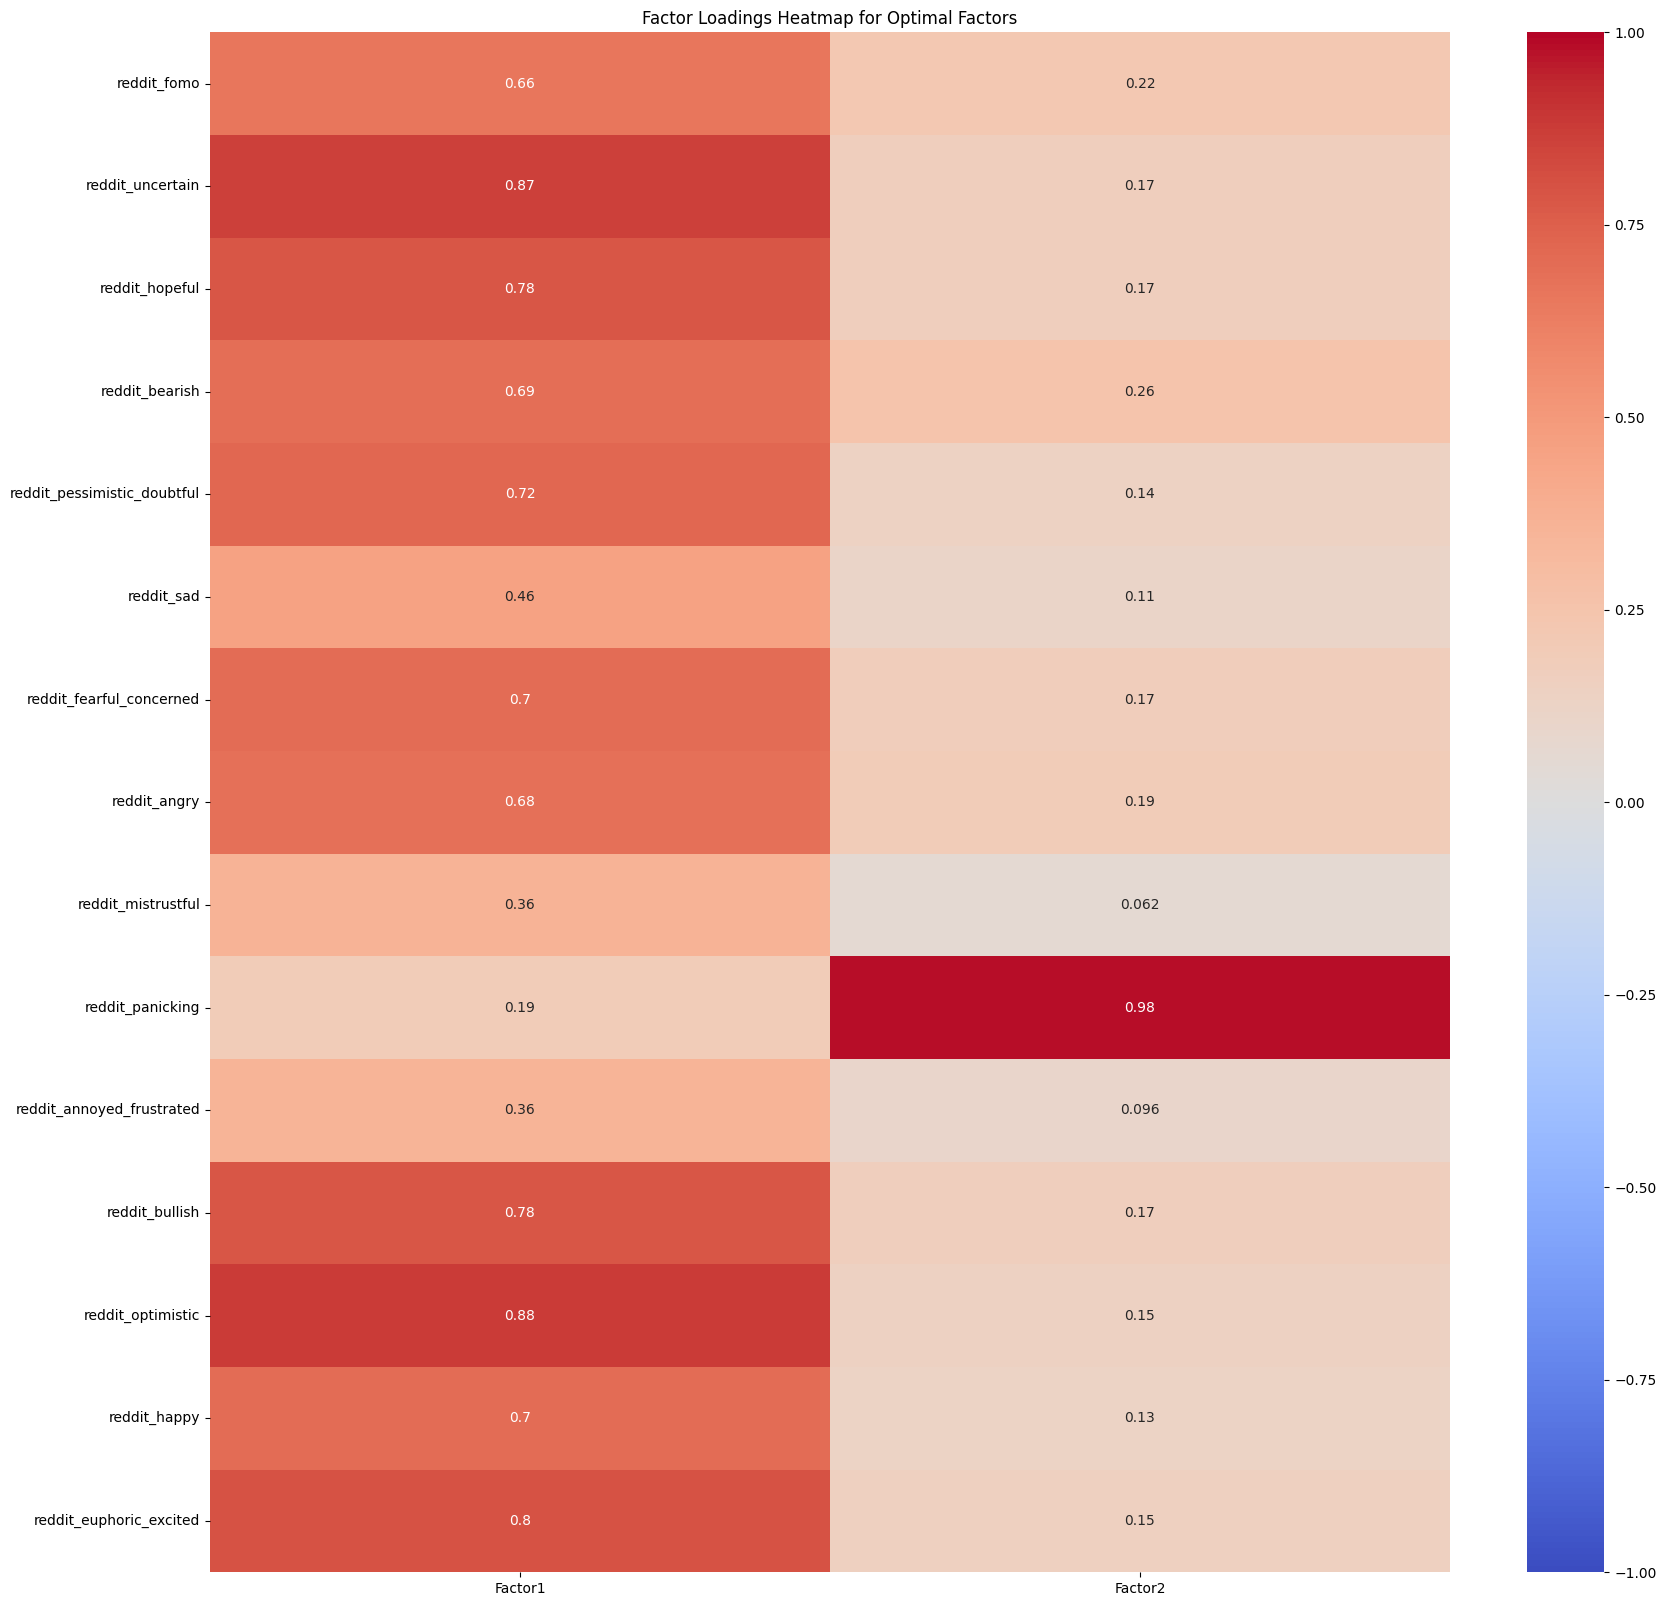

,Factor1,Factor2
reddit_fomo,0.661509,0.219066
reddit_uncertain,0.866801,0.170251
reddit_hopeful,0.782079,0.169495
reddit_bearish,0.690592,0.257188
reddit_pessimistic_doubtful,0.720514,0.135301
reddit_sad,0.460355,0.110807
reddit_fearful_concerned,0.697973,0.174732
reddit_angry,0.681225,0.190843
reddit_mistrustful,0.364101,0.061950
reddit_panicking,0.192693,0.978765


In [72]:
#Computing factors with rotation
optimal_factors = 2

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

# 3.8 Exploratory Factor Analysis

In [73]:
#Exploratory factor analysis for transformed data
from factor_analyzer import calculate_kmo, FactorAnalyzer
efa_data_trans = transformed_select_data

kmo_all, kmo_model = calculate_kmo(efa_data)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8 for acceptable factor analysis)")

#Factor seelction based on Kaiser criterion
fat = FactorAnalyzer(n_factors=efa_data.shape[1], rotation=None)
fat.fit(efa_data)


KMO Model Score: 0.970 (must be > 0.5; should be > 0.8 for acceptable factor analysis)


FactorAnalyzer(n_factors=15, rotation=None, rotation_kwargs={})

### 3.8.1 Factor selection based on eigenvalues
Keep factors with eigenvalues larger 1...

In [74]:
# Get eigenvalues
eigenvalues, _ = fat.get_eigenvalues()

eigenvalues

array([7.68196302, 0.89546416, 0.85868716, 0.8325825 , 0.76550484,
       0.57201778, 0.51663066, 0.47935072, 0.47632073, 0.45561574,
       0.3756554 , 0.35140912, 0.28124661, 0.26686227, 0.19068929])

-**First 12 factors should be selected according to Kaiser criterion.**

### 3.8.2 Factor selection based on cumulative variance
-60% of explained cumulative variance is sufficient

In [75]:
#Factor selection based on cumulative variance explained
variance_explained_fa_solution1 = fat.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [4.89498175e-01 2.13156881e-02 1.44939372e-02 1.39211189e-02
 8.72785055e-03 7.78457727e-03 4.28220178e-03 3.34067861e-03
 3.08506404e-03 2.63871287e-03 1.88504599e-03 8.95812036e-04
 5.57374691e-04 7.26379810e-05 0.00000000e+00]
Cumulative variance explained:
 [0.48949817 0.51081386 0.5253078  0.53922892 0.54795677 0.55574135
 0.56002355 0.56336423 0.56644929 0.569088   0.57097305 0.57186886
 0.57242624 0.57249887 0.57249887]


-**Keep first 29 factors to achieve 60% explained variance**

### 3.8.3 Factor selection based on Scree plot

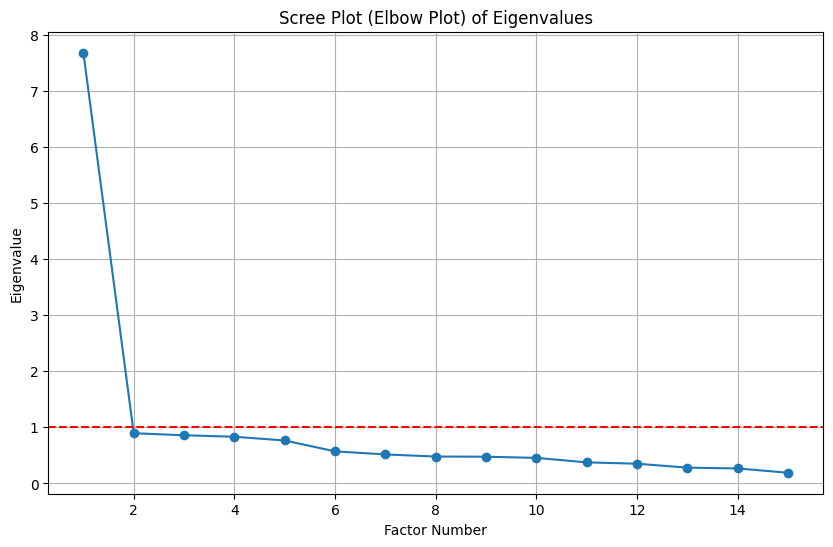

In [76]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, efa_data.shape[1] + 1), eigenvalues, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

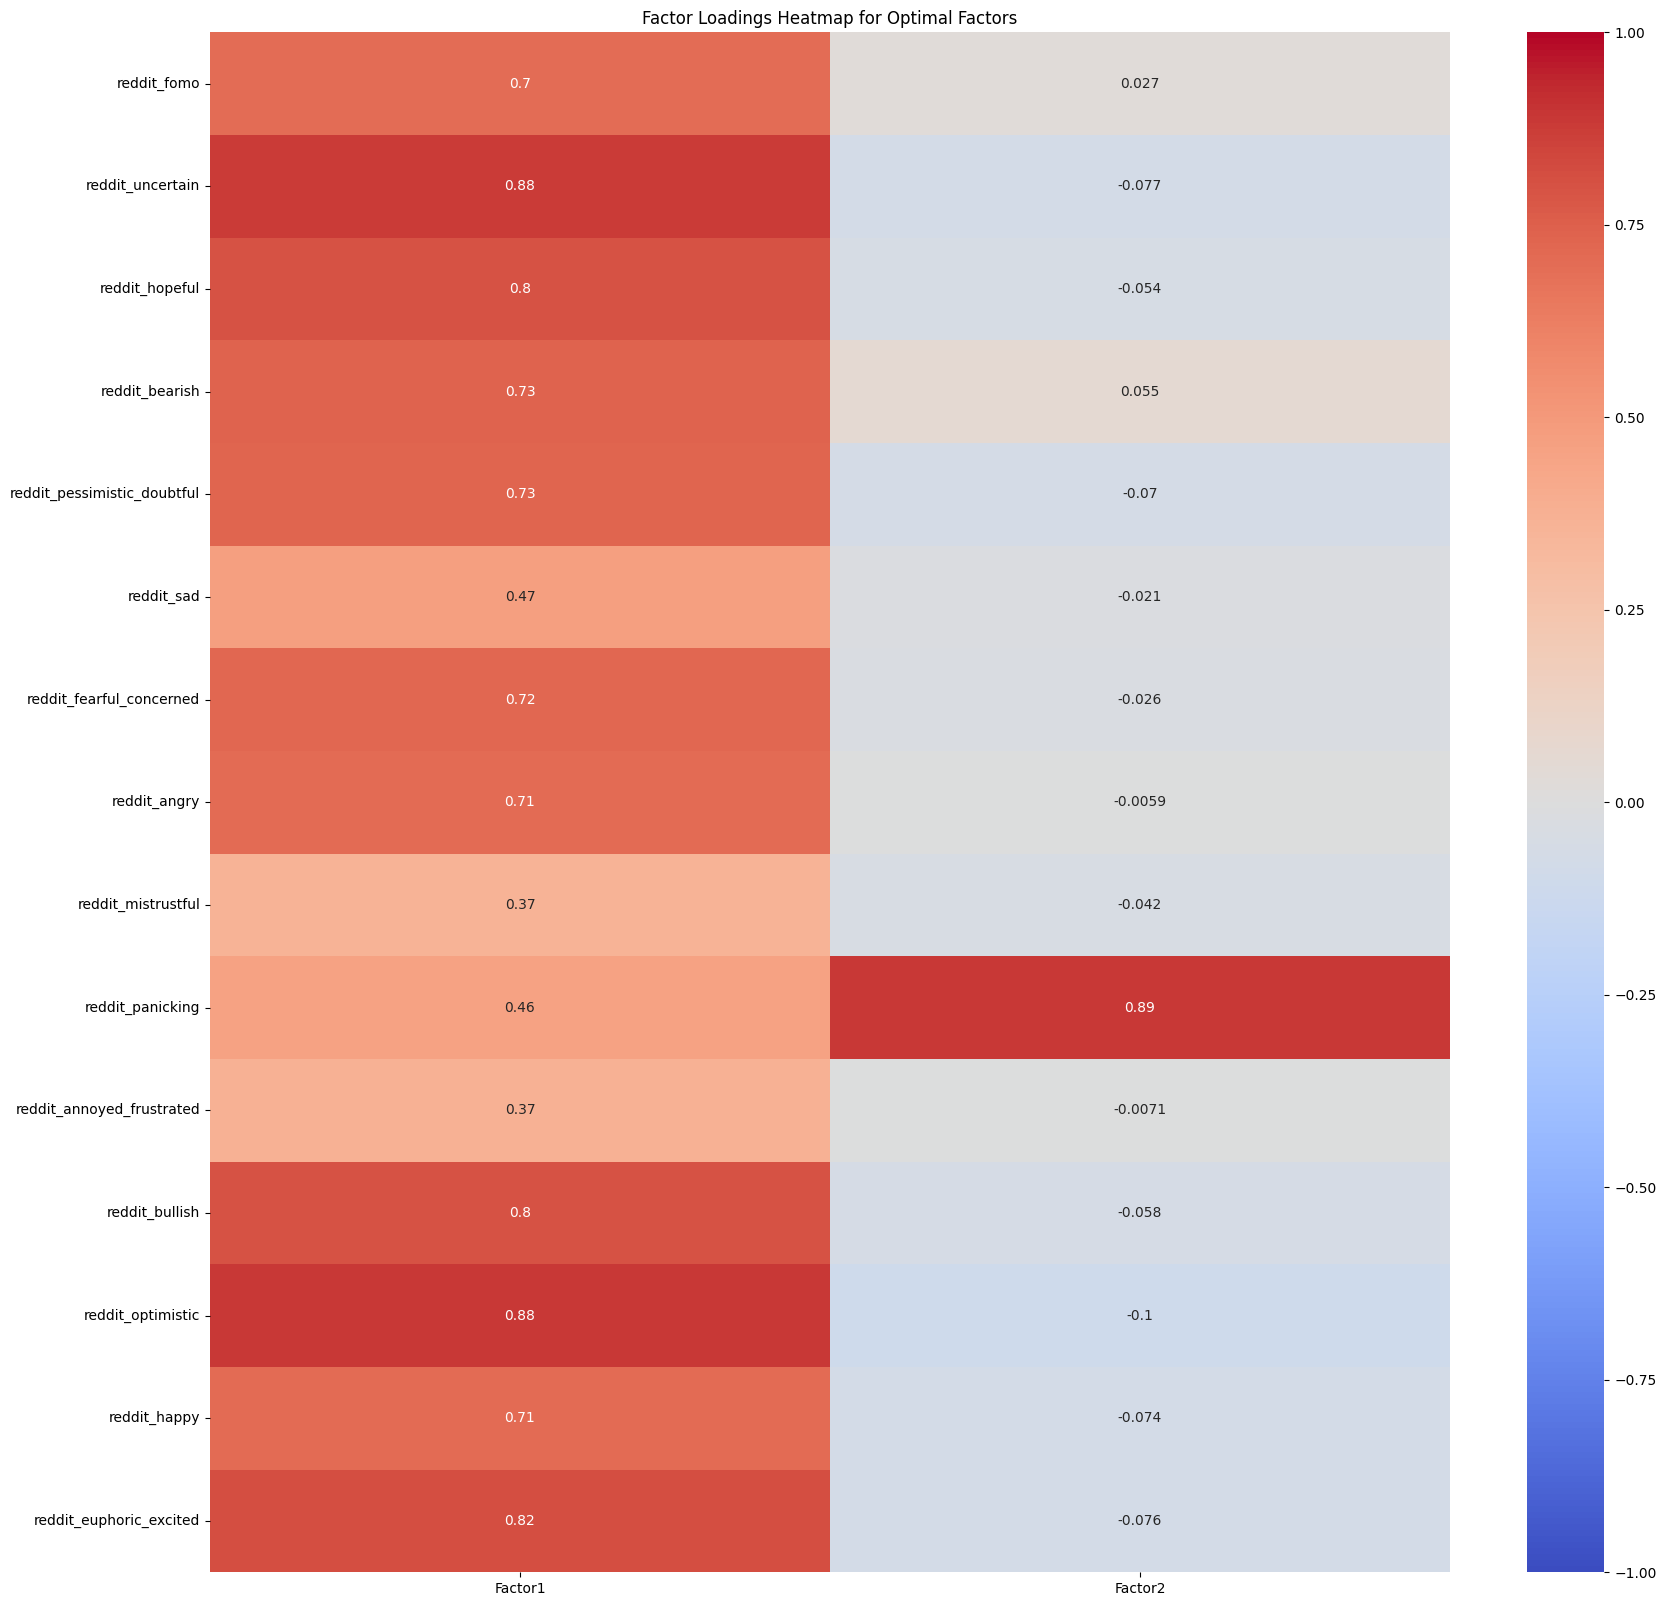

,Factor1,Factor2
reddit_fomo,0.696328,0.026682
reddit_uncertain,0.879979,-0.077241
reddit_hopeful,0.798382,-0.054431
reddit_bearish,0.734856,0.055225
reddit_pessimistic_doubtful,0.729741,-0.070177
reddit_sad,0.473017,-0.021437
reddit_fearful_concerned,0.719041,-0.026036
reddit_angry,0.707428,-0.005907
reddit_mistrustful,0.366980,-0.041633
reddit_panicking,0.457002,0.886714


In [77]:
#Computing factors without rotation
optimal_factors = 2

# Perform EFA with the optimal number of factors
fat_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fat_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fat_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
#print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt

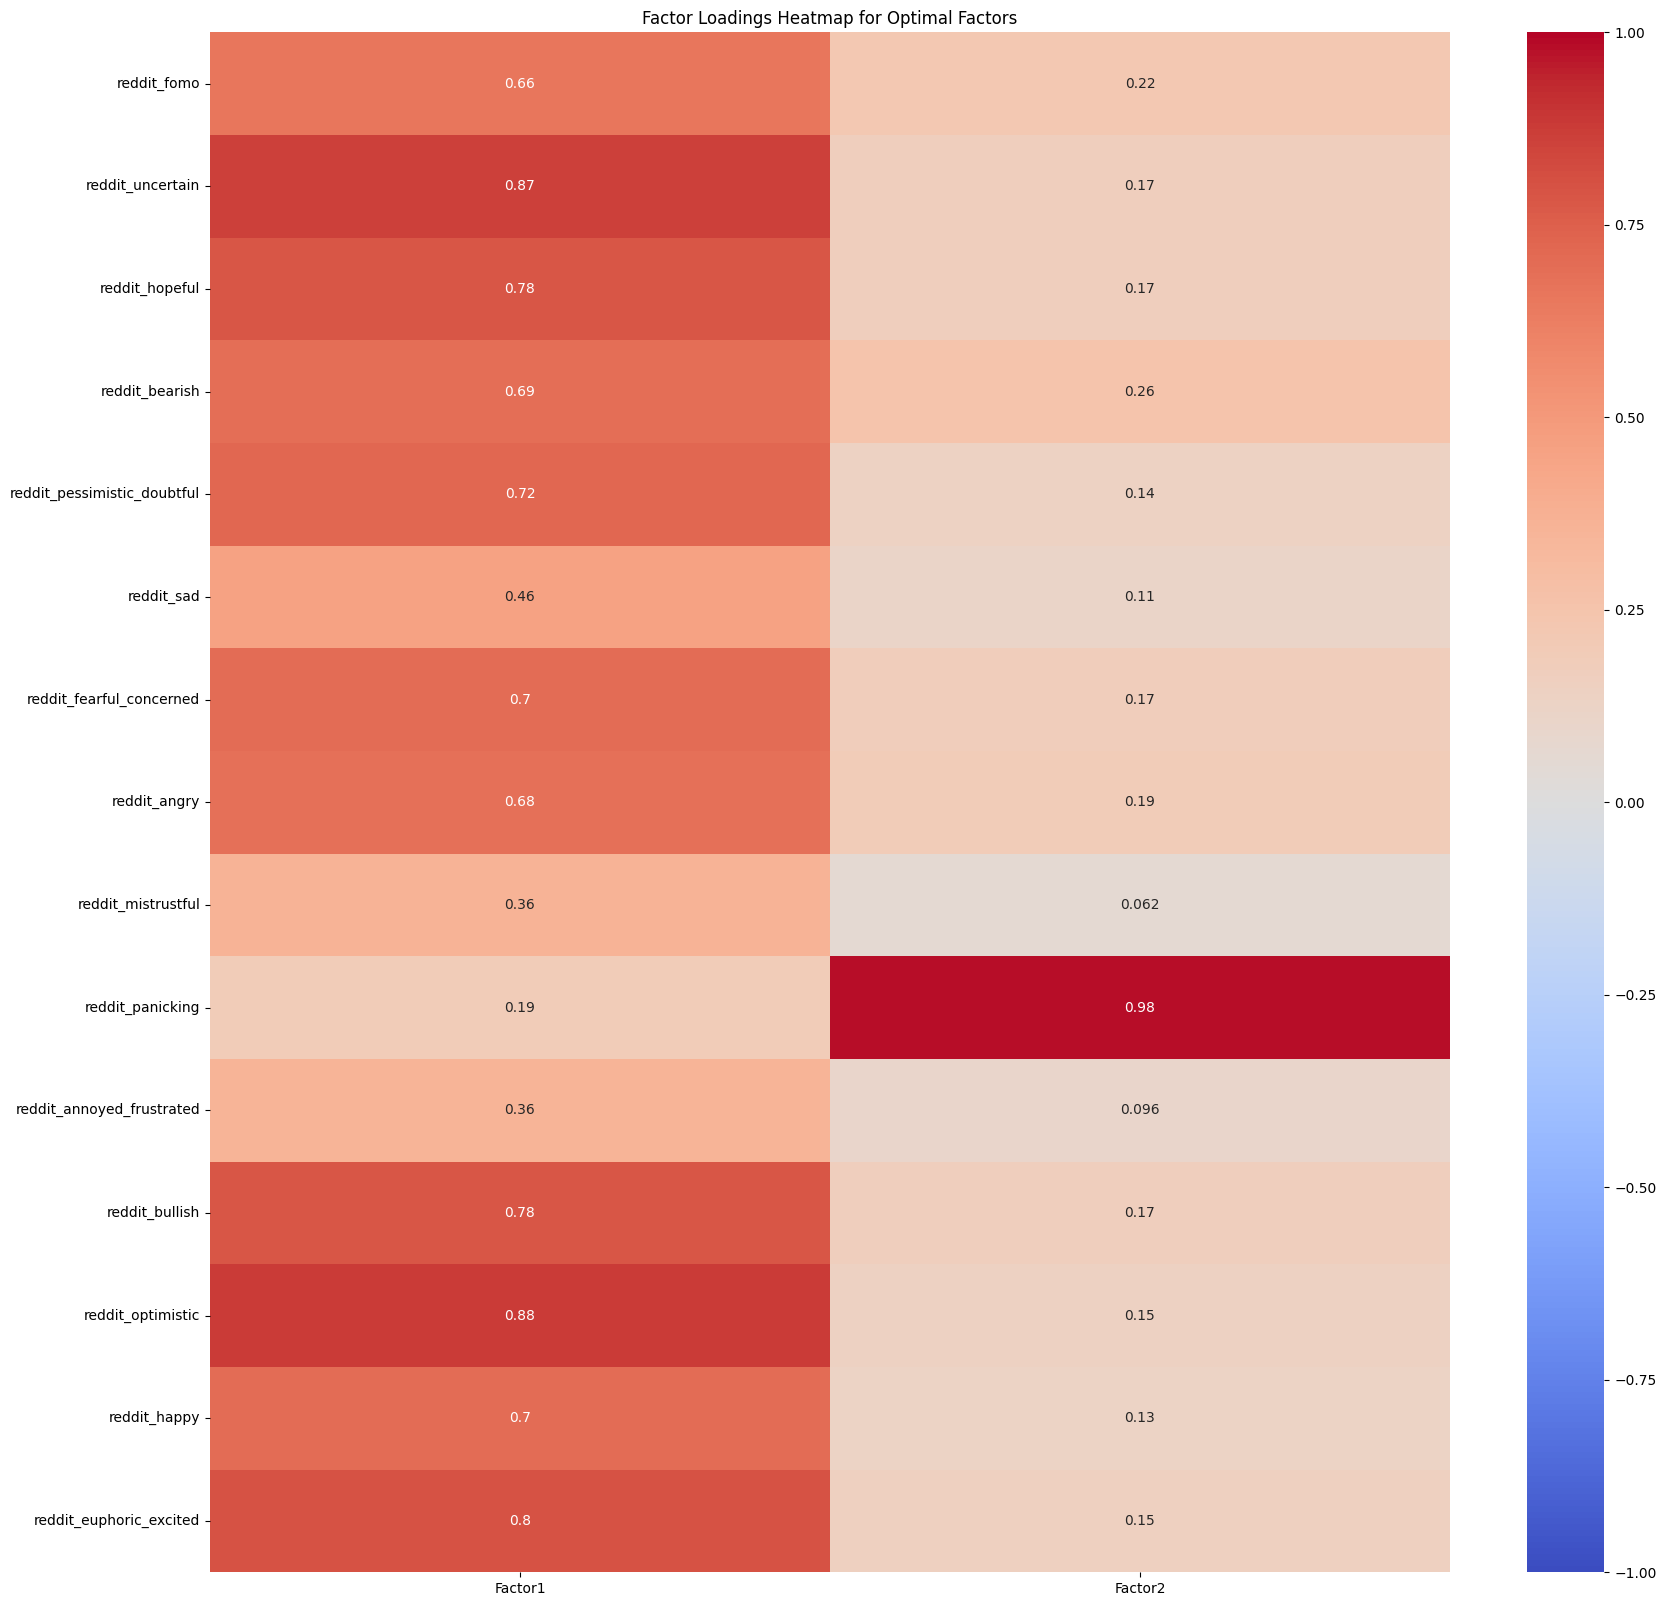

,Factor1,Factor2
reddit_fomo,0.661509,0.219066
reddit_uncertain,0.866801,0.170251
reddit_hopeful,0.782079,0.169495
reddit_bearish,0.690592,0.257188
reddit_pessimistic_doubtful,0.720514,0.135301
reddit_sad,0.460355,0.110807
reddit_fearful_concerned,0.697973,0.174732
reddit_angry,0.681225,0.190843
reddit_mistrustful,0.364101,0.061950
reddit_panicking,0.192693,0.978765


In [78]:
#Computing factors with rotation
optimal_factors = 2

# Perform EFA with the optimal number of factors
fat_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fat_opt.fit(efa_data)

# Extract factor loadings
loadings_opt = fat_opt.loadings_
columns = efa_data.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])

# we can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

factor_loadings_df_opt